In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
sns.set()

In [2]:
counties = gpd.read_file('/content/cb_2018_us_county_500k.shp')
county_results = pd.read_csv('https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-24/refs/heads/master/2024_US_County_Level_Presidential_Results.csv')
counties['GEOID'] = counties['GEOID'].astype(int)
merged_counties = pd.merge(counties, county_results, left_on='GEOID', right_on='county_fips')
countyResults2020 = pd.read_csv('https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-24/refs/heads/master/2020_US_County_Level_Presidential_Results.csv')
merged_counties = pd.merge(merged_counties, countyResults2020, left_on='GEOID', right_on='county_fips')

In [3]:
merged_counties['delta_2024'] = merged_counties['per_point_diff_x'] - merged_counties['per_point_diff_y']

Enter the name of the State of Interest: Wisconsin


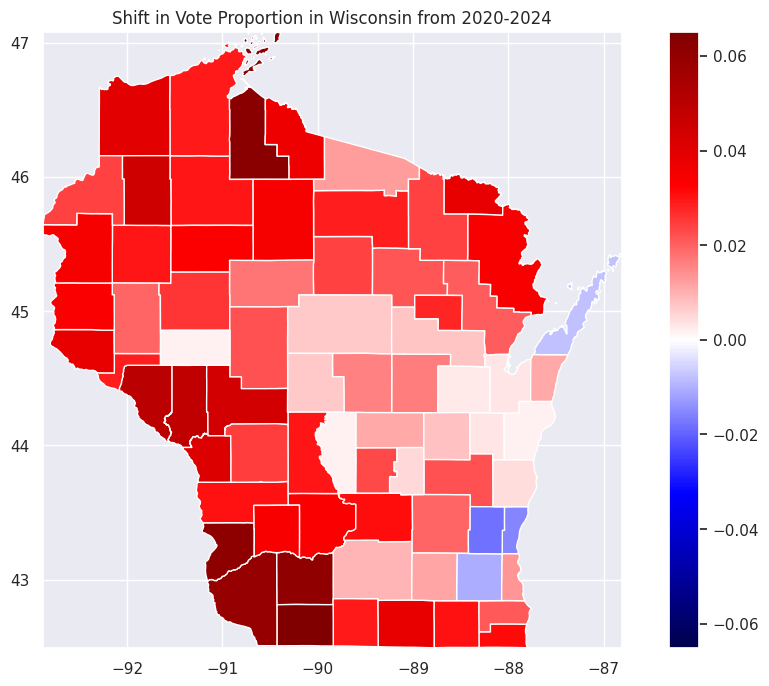

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

SOI = input("Enter the name of the State of Interest: ")
while SOI not in merged_counties['state_name_x'].to_list():
  SOI = input("Enter the name of the State of Interest (must be in the US): ")

state = merged_counties[merged_counties['state_name_x'] == SOI]

xmin, ymin, xmax, ymax = state.total_bounds

# Calculate the absolute maximum difference for centering
abs_max_diff = state['delta_2024'].abs().max()

# Plot with centered colormap
state.plot(
    ax=ax,
    column='delta_2024',
    cmap='seismic',
    vmin=-abs_max_diff,  # Set minimum value for colormap
    vmax=abs_max_diff,   # Set maximum value for colormap
    legend = True
)

# Set the limits of the x and y axes
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_title(f"Shift in Vote Proportion in {SOI} from 2020-2024")

plt.show()